In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [259]:
##  Set up the environment
sns.set(rc={'figure.figsize':(10, 6)})

In [260]:
## Load the dataset
df = pd.read_csv('./AmesHousing2.csv')

# Show all columns
pd.set_option('display.max_columns', None)  
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [261]:
## Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [262]:
print(df.columns.tolist())

# Define relevant features
features = [
    "MS SubClass", "Lot Frontage", "Lot Area", "Street", "Lot Shape", 
    "Land Contour", "Utilities", "Lot Config", "Land Slope", "Neighborhood", 
    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Overall Qual", 
    "Overall Cond", "Year Built", "Year Remod/Add", "Roof Style", "Exterior 1st", 
    "Exter Qual", "Exter Cond", "Foundation", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", 
    "BsmtFin SF 1", "BsmtFin Type 1", "BsmtFin Type 2", "Bsmt Unf SF", "Total Bsmt SF", 
    "Heating", "Heating QC", "Central Air", "Electrical", "1st Flr SF", "2nd Flr SF", 
    "Gr Liv Area", "Bsmt Full Bath", "Full Bath", "Half Bath", "Bedroom AbvGr", 
    "Kitchen AbvGr", "TotRms AbvGrd", "Fireplaces", "Garage Cars", "Garage Area", 
    "Garage Qual", "Garage Cond", "Paved Drive", "Wood Deck SF", "Open Porch SF", 
    "Enclosed Porch", "Pool Area", "Mo Sold", "Yr Sold", "Sale Type", "SalePrice"
]


# Filter the dataset to include only relevant features
df = df[features]

df.head()
df.shape

['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

(2930, 58)

In [263]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Lot Frontage      490
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin SF 1        1
BsmtFin Type 1     80
BsmtFin Type 2     81
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Garage Cars         1
Garage Area         1
Garage Qual       159
Garage Cond       159
dtype: int64

In [264]:
# Fill missing values Lot Frontage with mean
df['Lot Frontage'].value_counts(dropna=False)
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)

/tmp/ipykernel_20423/1462806768.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)


In [265]:
# Fill missing values Bsmt Exposure with 'No'
df['Bsmt Exposure'].value_counts(dropna=False)
df['Bsmt Exposure'].fillna('No', inplace=True)

/tmp/ipykernel_20423/1704983904.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bsmt Exposure'].fillna('No', inplace=True)


In [266]:
# Fill missing values BsmtFin Type 1  with mode
df['BsmtFin Type 1'].value_counts(dropna=False)
colum_BsmtFin_Type_1 = df['BsmtFin Type 1'].mode()[0]
df['BsmtFin Type 1'].fillna(colum_BsmtFin_Type_1, inplace=True)

/tmp/ipykernel_20423/1207559161.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtFin Type 1'].fillna(colum_BsmtFin_Type_1, inplace=True)


In [267]:
# Fill missing values BsmtFin Type 2 with mode
df['BsmtFin Type 2'].value_counts(dropna=False)
colum_BsmtFin_Type_2 = df['BsmtFin Type 2'].mode()[0]
df['BsmtFin Type 2'].fillna(colum_BsmtFin_Type_2, inplace=True)

/tmp/ipykernel_20423/1792770212.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtFin Type 2'].fillna(colum_BsmtFin_Type_2, inplace=True)


In [268]:
# Fill missing values Garage Qual  with mode
df['Garage Qual'].value_counts(dropna=False)
colum_Garage_Qual = df['Garage Qual'].mode()[0]
df['Garage Qual'].fillna(colum_Garage_Qual, inplace=True)

/tmp/ipykernel_20423/3820367300.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Garage Qual'].fillna(colum_Garage_Qual, inplace=True)


In [269]:
# Fill missing values Garage Cond with None
df['Garage Cond'].value_counts(dropna=False)
colum_Garage_Cond = df['Garage Cond'].mode()[0]
df['Garage Cond'].fillna(colum_Garage_Cond, inplace=True)

/tmp/ipykernel_20423/256082112.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Garage Cond'].fillna(colum_Garage_Cond, inplace=True)


In [270]:
# Fill missing values Bsmt Qual with mode
df['Bsmt Qual'].value_counts(dropna=False)
colum_bsmt_qual = df['Bsmt Qual'].mode()[0]
df['Bsmt Qual'].fillna(colum_bsmt_qual, inplace=True)

/tmp/ipykernel_20423/3148544876.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bsmt Qual'].fillna(colum_bsmt_qual, inplace=True)


In [271]:
# Fill missing values Bsmt Cond with None
df['Bsmt Cond'].value_counts(dropna=False)
colum_bsmt_cond = df['Bsmt Cond'].mode()[0]
df['Bsmt Cond'].fillna(colum_bsmt_cond, inplace=True)

/tmp/ipykernel_20423/3534175901.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bsmt Cond'].fillna(colum_bsmt_cond, inplace=True)


In [272]:
# Drop Line values 'NAN'
df.dropna(inplace=True)
df.shape

(2926, 58)

/tmp/ipykernel_20423/2160665907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette="coolwarm")


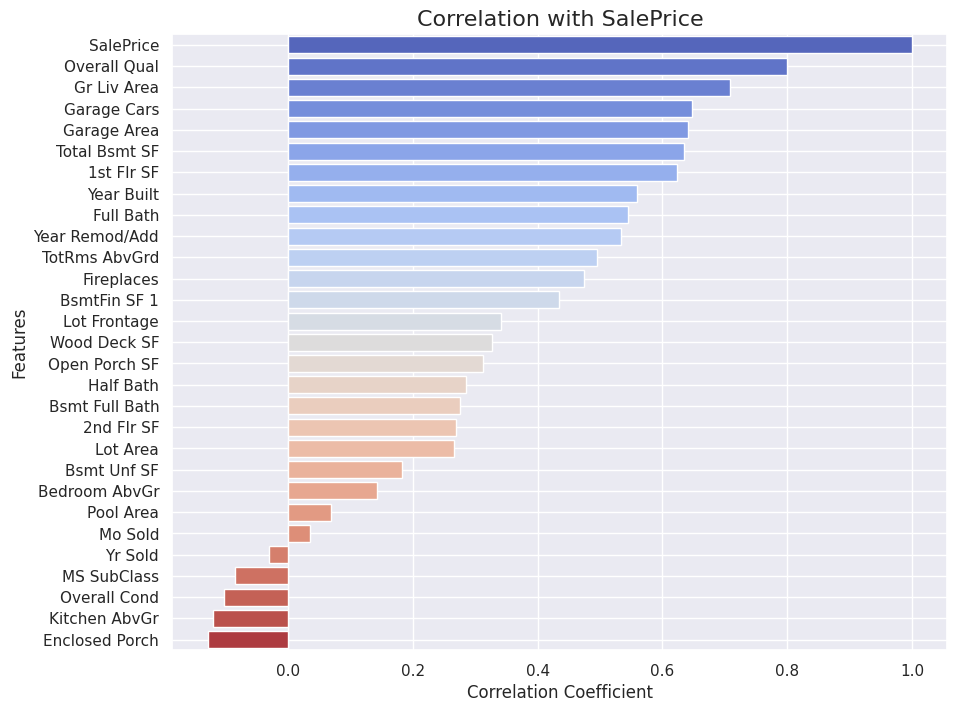

In [273]:
# Correlation matrix
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=correlation.values, y=correlation.index, palette="coolwarm")
plt.title('Correlation with SalePrice', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.show()

In [305]:
# Check for Types Object
df.select_dtypes(include='object').info()


<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2929
Empty DataFrame


In [275]:
# Fix the data Street 
df['Street'].value_counts(dropna=False)
df['Street'].replace({'Grvl': 0, 'Pave': 1}, inplace=True)
df[['Street']].value_counts(dropna=False)


/tmp/ipykernel_20423/979899554.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Street'].replace({'Grvl': 0, 'Pave': 1}, inplace=True)
/tmp/ipykernel_20423/979899554.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Street'].replace({'Grvl': 0, 'Pave': 1}, inplace=True)


Street
1         2914
0           12
Name: count, dtype: int64

In [276]:
# Fix the data Lot Shape
df['Lot Shape'].value_counts(dropna=False)
df['Lot Shape'].replace({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}, inplace=True)
df[['Lot Shape']].value_counts(dropna=False)

/tmp/ipykernel_20423/4051604930.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Shape'].replace({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}, inplace=True)
/tmp/ipykernel_20423/4051604930.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lot Shape'].replace({'Reg': 0, 'IR1': 1, 'IR2': 

Lot Shape
0            1857
1             977
2              76
3              16
Name: count, dtype: int64

In [277]:
# Fix the data Land Contour
df['Land Contour'].value_counts(dropna=False)
df['Land Contour'].replace({'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3}, inplace=True)
df[['Land Contour']].value_counts(dropna=False)


/tmp/ipykernel_20423/1654116628.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Land Contour'].replace({'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3}, inplace=True)
/tmp/ipykernel_20423/1654116628.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Land Contour'].replace({'Lvl': 0, 'Bnk': 1, '

Land Contour
0               2629
2                120
1                117
3                 60
Name: count, dtype: int64

In [278]:
 # Fix the data Utilities
df['Utilities'].value_counts(dropna=False)
df['Utilities'].replace({'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3}, inplace=True)
df[['Utilities']].value_counts(dropna=False)

/tmp/ipykernel_20423/2848928977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Utilities'].replace({'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3}, inplace=True)
/tmp/ipykernel_20423/2848928977.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Utilities'].replace({'AllPub': 0, 'NoSe

Utilities
0            2923
1               2
2               1
Name: count, dtype: int64

In [279]:
# Fix the data Lot Config
df['Lot Config'].value_counts(dropna=False)
df['Lot Config'].replace({'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4}, inplace=True)
df[['Lot Config']].value_counts(dropna=False)

/tmp/ipykernel_20423/4017247521.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lot Config'].replace({'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4}, inplace=True)
/tmp/ipykernel_20423/4017247521.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lot Config'].replace({'Insi

Lot Config
0             2137
1              511
2              180
3               85
4               13
Name: count, dtype: int64

In [280]:
# Fix the data Land Slope
df['Land Slope'].value_counts(dropna=False)
df['Land Slope'].replace({'Gtl': 0, 'Mod': 1, 'Sev': 2}, inplace=True)
df[['Land Slope']].value_counts(dropna=False)

/tmp/ipykernel_20423/2829650259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Land Slope'].replace({'Gtl': 0, 'Mod': 1, 'Sev': 2}, inplace=True)
/tmp/ipykernel_20423/2829650259.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Land Slope'].replace({'Gtl': 0, 'Mod': 1, 'Sev': 2}, inpl

Land Slope
0             2785
1              125
2               16
Name: count, dtype: int64

In [281]:
# Fix the data Neighborhood
df['Neighborhood'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])

# Cek hasil
print(df['Neighborhood'].value_counts())

Neighborhood
15    443
5     267
20    239
7     193
24    182
19    166
8     165
22    151
17    131
23    125
14    114
3     107
6     103
11     92
18     71
26     71
25     51
21     48
4      44
13     37
2      30
0      28
27     24
16     23
1      10
9       8
10      2
12      1
Name: count, dtype: int64


In [282]:
# Fix the data Condition 1
df['Condition 1'].value_counts(dropna=False)
df['Condition 1'].replace({
    'Norm': 0, 'Feedr': 1, 'Artery': 2, 'RRAn': 3, 'PosN': 4,
    'RRAe': 5, 'PosA': 6, 'RRNn': 7, 'RRNe': 8
}, inplace=True)
df[['Condition 1']].value_counts()

/tmp/ipykernel_20423/2023290633.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Condition 1'].replace({
/tmp/ipykernel_20423/2023290633.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Condition 1'].replace({


Condition 1
0              2519
1               163
2                92
3                50
4                39
5                28
6                20
7                 9
8                 6
Name: count, dtype: int64

In [283]:
# Fix the data Condition 2
df['Condition 2'].value_counts(dropna=False)
df['Condition 2'].replace({
    'Norm': 0, 'Feedr': 1, 'Artery': 2, 'PosA': 3, 'PosN': 4,
    'RRNn': 5, 'RRAe': 6, 'RRAn': 7
}, inplace=True)
df[['Condition 2']].value_counts()

/tmp/ipykernel_20423/3580156649.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Condition 2'].replace({
/tmp/ipykernel_20423/3580156649.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Condition 2'].replace({


Condition 2
0              2896
1                13
2                 5
3                 4
4                 4
5                 2
6                 1
7                 1
Name: count, dtype: int64

In [284]:
# Fix the data Bldg Type
df['Bldg Type'].value_counts(dropna=False)
df['Bldg Type'].replace({
    '1Fam': 0, 'TwnhsE': 1, 'Duplex': 2,
    'Twnhs': 3,'2fmCon': 4
}, inplace=True)
df[['Bldg Type']].value_counts()

/tmp/ipykernel_20423/3079106554.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bldg Type'].replace({
/tmp/ipykernel_20423/3079106554.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bldg Type'].replace({


Bldg Type
0            2421
1             233
2             109
3             101
4              62
Name: count, dtype: int64

In [285]:
# Fix the data House Style
df['House Style'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['House Style'] = le.fit_transform(df['House Style'])

# Cek hasil
df['House Style'].value_counts(dropna=False)

House Style
2    1479
5     872
0     314
7     127
6      83
4      24
1      19
3       8
Name: count, dtype: int64

In [286]:
# Fix the data Roof Style
df['Roof Style'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Roof Style'] = le.fit_transform(df['Roof Style'])

# Cek hasil
df['Roof Style'].value_counts(dropna=False)

Roof Style
1    2317
3     551
2      22
0      20
4      11
5       5
Name: count, dtype: int64

In [287]:
# Fix the data Exterior 1st 
df['Exterior 1st'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Exterior 1st'] = le.fit_transform(df['Exterior 1st'])

# Cek hasil
df['Exterior 1st'].value_counts(dropna=False)

Exterior 1st
13    1025
8      449
6      442
14     419
9      220
5      126
3       88
15      56
0       44
12      43
2        6
1        2
4        2
11       2
10       1
7        1
Name: count, dtype: int64

In [288]:
# Fix the data Exter Qual
df['Exter Qual'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Exter Qual'] = le.fit_transform(df['Exter Qual'])

# Cek hasil
df['Exter Qual'].value_counts(dropna=False)

Exter Qual
3    1795
2     989
0     107
1      35
Name: count, dtype: int64

In [289]:
# Fix the data Exter Cond
df['Exter Cond'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Exter Cond'] = le.fit_transform(df['Exter Cond'])

# Cek hasil
df['Exter Cond'].value_counts(dropna=False)

Exter Cond
4    2545
2     299
1      67
0      12
3       3
Name: count, dtype: int64

In [290]:
# Fix the data Foundation
df['Foundation'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Foundation'] = le.fit_transform(df['Foundation'])
# Cek hasil
df['Foundation'].value_counts(dropna=False)

Foundation
2    1308
1    1244
0     310
3      48
4      11
5       5
Name: count, dtype: int64

In [291]:
# Fix the data Bsmt Qual
df['Bsmt Qual'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Bsmt Qual'] = le.fit_transform(df['Bsmt Qual'])
# Cek hasil
df['Bsmt Qual'].value_counts(dropna=False)

Bsmt Qual
4    1361
2    1217
0     258
1      88
3       2
Name: count, dtype: int64

In [292]:
# Fix the data Bsmt Cond 
df['Bsmt Cond'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Bsmt Cond'] = le.fit_transform(df['Bsmt Cond'])
# Cek hasil
df['Bsmt Cond'].value_counts(dropna=False)

Bsmt Cond
4    2692
2     122
1     104
3       5
0       3
Name: count, dtype: int64

In [293]:
# Fix the data Bsmt Exposure
df['Bsmt Exposure'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Bsmt Exposure'] = le.fit_transform(df['Bsmt Exposure'])
# Cek hasil
df['Bsmt Exposure'].value_counts(dropna=False) 

Bsmt Exposure
3    1985
0     418
1     284
2     239
Name: count, dtype: int64

In [294]:
# Fix the data BsmtFin Type 1
df['BsmtFin Type 1'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['BsmtFin Type 1'] = le.fit_transform(df['BsmtFin Type 1'])
# Cek hasil
df['BsmtFin Type 1'].value_counts(dropna=False)

BsmtFin Type 1
2    937
5    850
0    428
4    288
1    269
3    154
Name: count, dtype: int64

In [295]:
# Fix the data Lot BsmtFin Type 1
df['BsmtFin Type 2'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['BsmtFin Type 2'] = le.fit_transform(df['BsmtFin Type 2'])
# Cek hasil
df['BsmtFin Type 2'].value_counts(dropna=False)

BsmtFin Type 2
5    2576
4     106
3      89
1      68
0      53
2      34
Name: count, dtype: int64

In [296]:
# Fix the data Heating
df['Heating'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Heating'] = le.fit_transform(df['Heating'])
# Cek hasil
df['Heating'].value_counts(dropna=False)

Heating
1    2881
2      27
3       9
5       6
4       2
0       1
Name: count, dtype: int64

In [297]:
# Fix the data Heating QC
df['Heating QC'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Heating QC'] = le.fit_transform(df['Heating QC'])
# Cek hasil
df['Heating QC'].value_counts(dropna=False)

Heating QC
0    1494
4     862
2     475
1      92
3       3
Name: count, dtype: int64

In [298]:
# Fix the data Central Air
df['Central Air'].value_counts(dropna=False)
df['Central Air'].replace({'Y': 1, 'N': 0}, inplace=True)   
# Cek hasil
df['Central Air'].value_counts(dropna=False)


/tmp/ipykernel_20423/4067348139.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Central Air'].replace({'Y': 1, 'N': 0}, inplace=True)
/tmp/ipykernel_20423/4067348139.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Central Air'].replace({'Y': 1, 'N': 0}, inplace=True)


Central Air
1    2730
0     196
Name: count, dtype: int64

In [299]:
# Fix the data Electrical
df['Electrical'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Electrical'] = le.fit_transform(df['Electrical'])
# Cek hasil
df['Electrical'].value_counts(dropna=False)

Electrical
4    2680
0     187
1      50
2       8
3       1
Name: count, dtype: int64

In [300]:
# Fix the data Garage Qual
df['Garage Qual'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Garage Qual'] = le.fit_transform(df['Garage Qual'])
# Cek hasil
df['Garage Qual'].value_counts(dropna=False)

Garage Qual
4    2770
1     124
2      24
3       5
0       3
Name: count, dtype: int64

In [301]:
# Fix the data Garage Cond
df['Garage Cond'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Garage Cond'] = le.fit_transform(df['Garage Cond'])
# Cek hasil
df['Garage Cond'].value_counts(dropna=False)

Garage Cond
4    2820
1      74
2      15
3      14
0       3
Name: count, dtype: int64

In [304]:
# Fix the data Paved Drive
df['Paved Drive'].value_counts(dropna=False)
df['Paved Drive'].replace({'Y': 1, 'P': 0.5, 'N': 0}, inplace=True)
# Cek hasil
df['Paved Drive'].value_counts(dropna=False)

/tmp/ipykernel_20423/4072193476.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Paved Drive'].replace({'Y': 1, 'P': 0.5, 'N': 0}, inplace=True)
/tmp/ipykernel_20423/4072193476.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Paved Drive'].replace({'Y': 1, 'P': 0.5, 'N': 0}, inplace=Tr

Paved Drive
1.0    2648
0.0     216
0.5      62
Name: count, dtype: int64

In [303]:
# Fix the data Sale Type
df['Sale Type'].value_counts(dropna=False)
le = sklearn.preprocessing.LabelEncoder()
df['Sale Type'] = le.fit_transform(df['Sale Type'])
# Cek hasil
df['Sale Type'].value_counts(dropna=False)

Sale Type
9    2533
6     239
0      87
3      25
1      12
4       9
5       8
7       7
2       5
8       1
Name: count, dtype: int64

In [309]:
df.head()

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin SF 1,BsmtFin Type 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Pool Area,Mo Sold,Yr Sold,Sale Type,SalePrice
0,20,141.0,31770,1,1,0,0,1,0,15,0,0,0,2,6,5,1960,1960,3,3,3,4,1,4,2,1,639.0,1,5,441.0,1080.0,1,1,1,4,1656,0,1656,1.0,1,0,3,1,7,2,2.0,528.0,4,4,0.5,210,62,0,0,5,2010,9,215000
1,20,80.0,11622,1,0,0,0,0,0,15,1,0,0,2,5,6,1961,1961,1,13,3,4,1,4,4,3,468.0,4,3,270.0,882.0,1,4,1,4,896,0,896,0.0,1,0,2,1,5,0,1.0,730.0,4,4,1.0,140,0,0,0,6,2010,9,105000
2,20,81.0,14267,1,1,0,0,1,0,15,0,0,0,2,6,6,1958,1958,3,14,3,4,1,4,4,3,923.0,0,5,406.0,1329.0,1,4,1,4,1329,0,1329,0.0,1,1,3,1,6,0,1.0,312.0,4,4,1.0,393,36,0,0,6,2010,9,172000
3,20,93.0,11160,1,0,0,0,1,0,15,0,0,0,2,7,5,1968,1968,3,3,2,4,1,4,4,3,1065.0,0,5,1045.0,2110.0,1,0,1,4,2110,0,2110,1.0,2,1,3,1,8,2,2.0,522.0,4,4,1.0,0,0,0,0,4,2010,9,244000
4,60,74.0,13830,1,1,0,0,0,0,8,0,0,0,5,5,5,1997,1998,1,13,3,4,2,2,4,3,791.0,2,5,137.0,928.0,1,2,1,4,928,701,1629,0.0,2,1,3,1,6,1,2.0,482.0,4,4,1.0,212,34,0,0,3,2010,9,189900


In [308]:
df.shape

(2926, 58)

In [ ]:
# For example 'SalePrice' is the target column
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the dataset into training and testing sets (for example 80% training, 20% testing)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)